## Libraries


In [43]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from utils import preprocessing as prep

import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# %load_ext autoreload
# %autoreload 2

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading data

In [2]:
# small dataframe, 1 week of data
df_full_small = pd.read_csv('../data/Data_20230306_20230312_with_distance.csv', low_memory = False)

In [3]:
# large dataframe, 4 months of data
df1 = pd.read_csv('../data/Data_20230101_20230131.csv', low_memory=False)
df2 = pd.read_csv('../data/Data_20230201_20230228.csv', low_memory=False)
df3 = pd.read_csv('../data/Data_20230301_20230331.csv', low_memory=False)
df4 = pd.read_csv('../data/Data_20230401_20230430.csv', low_memory=False)
df5 = pd.read_csv('../data/Data_20230501_20230531.csv', low_memory=False)
df6 = pd.read_csv('../data/Data_20230601_20230630.csv', low_memory=False)
df7 = pd.read_csv('../data/Data_20230701_20230731.csv', low_memory=False)
df8 = pd.read_csv('../data/Data_20230801_20230831.csv', low_memory=False)
df9 = pd.read_csv('../data/Data_20230901_20230930.csv', low_memory=False)
df10 = pd.read_csv('../data/Data_20231001_20231031.csv', low_memory=False)
df11 = pd.read_csv('../data/Data_20231101_20231130.csv', low_memory=False)
df12 = pd.read_csv('../data/Data_20231201_20231231.csv', low_memory=False)

#df_full_large = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9 ,df10, df11, df12], ignore_index=True)

## Preprocessing data

In [4]:
def preprocess(df):
    df = prep.set_types(df)
    df = prep.sort(df)
    df = prep.cum_distance(df)
    df = prep.calc_turnover(df)
    df = prep.remove_unnecessary_rows(df)
    df = prep.add_max_departure_time(df)
    df = prep.calculate_signal_safe_delay(df)
    df = prep.filter_outliers(df)
    df = prep.categorise_combine_spilt(df)
    df = prep.determine_daluren(df)
    df = prep.days_and_hours(df)
    df = prep.cyclical_encoder(df, "DAY_OF_WEEK")
    df = prep.cyclical_encoder(df, "HOUR")
    df = prep.calc_needed_turnover(df)
    df = prep.add_cat_diff_turnover_time(df)
    df = prep.remove_past_3_min(df)

    return df

In [5]:
workable_df_small = df_full_small.copy()

workable_df_small = preprocess(workable_df_small)
workable_df_small.head()

c:\Users\Tim Rentenaar\OneDrive - HvA\Documents\Master ADS\Thesis\github\notebooks\..\utils\preprocessing.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["PLAN_TURNOVER_TIME"] = plan_turnover_time
c:\Users\Tim Rentenaar\OneDrive - HvA\Documents\Master ADS\Thesis\github\notebooks\..\utils\preprocessing.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["REALIZED_TURNOVER_TIME"] = real_turnover_time
c:\Users\Tim Rentenaar\OneDrive - HvA\Documents\Master ADS\Thesis\github\notebooks\..\util

,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,CUM_DISTANCE_M,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME,DIFF_TURNOVER_TIME_CAT
380,2023-03-06,11716,11700.0,E,Ut,V,0.0,2023-03-06 06:58:00+00:00,2023-03-06 06:58:22+00:00,22.0,1,nan,0,0,ICM,7.0,1,2023-03-06 06:57:08+00:00,24051.0,300.0,200.0,NaN,-52.0,-74.0,False,0,6,0.0,1.0,1.000000,6.123234e-17,338.0,238.0,100.0,too late
388,2023-03-06,11720,11700.0,E,Ut,V,0.0,2023-03-06 07:58:00+00:00,2023-03-06 08:04:28+00:00,388.0,1,nan,0,0,ICM,12.0,0,2023-03-06 07:57:07+00:00,24051.0,300.0,478.0,NaN,-53.0,-441.0,False,0,7,0.0,1.0,0.965926,-2.588190e-01,-28.0,150.0,-178.0,too early
396,2023-03-06,11721,11700.0,O,Ut,V,0.0,2023-03-06 07:07:00+00:00,2023-03-06 07:07:03+00:00,3.0,1,nan,0,0,ICM,12.0,1,2023-03-06 07:06:08+00:00,60252.0,300.0,333.0,NaN,-52.0,-55.0,False,0,7,0.0,1.0,0.965926,-2.588190e-01,357.0,390.0,-33.0,perfect
404,2023-03-06,11724,11700.0,E,Ut,V,0.0,2023-03-06 08:58:00+00:00,2023-03-06 08:58:08+00:00,8.0,1,nan,0,0,ICM,7.0,1,2023-03-06 08:57:08+00:00,24051.0,300.0,259.0,NaN,-52.0,-60.0,False,0,8,0.0,1.0,0.866025,-5.000000e-01,352.0,311.0,41.0,perfect
420,2023-03-06,11728,11700.0,E,Ut,V,0.0,2023-03-06 09:58:00+00:00,2023-03-06 09:58:10+00:00,10.0,1,nan,0,0,ICM,6.0,1,2023-03-06 09:57:08+00:00,24051.0,300.0,303.0,NaN,-52.0,-62.0,True,0,9,0.0,1.0,0.707107,-7.071068e-01,350.0,353.0,-3.0,perfect


In [6]:
df1 = preprocess(df1)
df2 = preprocess(df2)
df3 = preprocess(df3)
df4 = preprocess(df4)
df5 = preprocess(df5)
df6 = preprocess(df6)
df7 = preprocess(df7)
df8 = preprocess(df8)
df9 = preprocess(df9)
df10 = preprocess(df10)
df11 = preprocess(df11)
df12 = preprocess(df12)

df_full_large = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9 ,df10, df11, df12], ignore_index=True)

c:\Users\Tim Rentenaar\OneDrive - HvA\Documents\Master ADS\Thesis\github\notebooks\..\utils\preprocessing.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["PLAN_TURNOVER_TIME"] = plan_turnover_time
c:\Users\Tim Rentenaar\OneDrive - HvA\Documents\Master ADS\Thesis\github\notebooks\..\utils\preprocessing.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["REALIZED_TURNOVER_TIME"] = real_turnover_time
c:\Users\Tim Rentenaar\OneDrive - HvA\Documents\Master ADS\Thesis\github\notebooks\..\util

In [17]:
df_full_large.head()

,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,CUM_DISTANCE_M,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME,DIFF_TURNOVER_TIME_CAT
0,2023-01-01,11736,11700.0,E,Ut,V,0.0,2023-01-01 11:58:00+00:00,2023-01-01 11:59:02+00:00,62.0,1,nan,0,0,DDZ,6.0,1,2023-01-01 11:57:07+00:00,24051.0,300.0,193.0,NaN,-53.0,-115.0,True,6,11,-0.781831,0.62349,2.588190e-01,-0.965926,298.0,191.0,107.0,too late
1,2023-01-01,11740,11700.0,E,Ut,V,0.0,2023-01-01 12:58:00+00:00,2023-01-01 12:57:59+00:00,-1.0,1,nan,0,0,DDZ,6.0,1,2023-01-01 12:57:08+00:00,24051.0,300.0,279.0,NaN,-52.0,-51.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,361.0,340.0,21.0,perfect
2,2023-01-01,11741,11700.0,O,Ut,V,0.0,2023-01-01 12:07:00+00:00,2023-01-01 12:07:25+00:00,25.0,1,nan,0,0,DDZ,6.0,1,2023-01-01 12:06:07+00:00,60252.0,300.0,330.0,NaN,-53.0,-78.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,335.0,365.0,-30.0,perfect
3,2023-01-01,11744,11700.0,E,Ut,V,0.0,2023-01-01 13:58:00+00:00,2023-01-01 13:58:09+00:00,9.0,1,nan,0,0,ICM,6.0,1,2023-01-01 13:57:07+00:00,24051.0,300.0,223.0,NaN,-53.0,-62.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,351.0,274.0,77.0,too late
4,2023-01-01,11745,11700.0,O,Ut,V,0.0,2023-01-01 13:07:00+00:00,2023-01-01 13:07:20+00:00,20.0,1,nan,0,0,ICM,6.0,1,2023-01-01 13:06:07+00:00,60252.0,300.0,349.0,NaN,-53.0,-73.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,340.0,389.0,-49.0,perfect


## Save preprocessed data

In [9]:
current_date = '24-05-2024'

In [10]:
# saving the small dataframe

# determining the name of the file
file_name_small = '../data/small_preprocessed_week_' + current_date + '.csv'

# saving the csv
workable_df_small.to_csv(file_name_small)

In [12]:
# saving the large dataframe

# determining the name of the file
file_name_large = '../data/large_preprocessed_week_' + current_date + '.csv'

# saving the csv
df_full_large.to_csv(file_name_large)

## Additional filtering and splitting

In [2]:
# load data
df_large_clean = pd.read_csv('../data/large_preprocessed_week_23-05-2024.csv', low_memory=False)

df_large_clean.head()

,Unnamed: 0,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME,DIFF_TURNOVER_TIME_CAT
0,59,2023-01-01,650,600.0,E,Ut,V,0.0,2023-01-01 15:48:00+00:00,2023-01-01 15:48:10+00:00,10.0,1,NaN,0,0,ICM,7.0,1.0,2023-01-01 15:47:06+00:00,1200.0,1175.0,NaN,-54.0,-64.0,True,6,15,-0.781831,0.62349,-7.071068e-01,-0.707107,1250.0,1225.0,25.0,perfect
1,66,2023-01-01,657,600.0,O,Ut,V,0.0,2023-01-01 16:19:00+00:00,2023-01-01 16:19:03+00:00,3.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 16:18:07+00:00,2130.0,2086.0,NaN,-53.0,-56.0,True,6,16,-0.781831,0.62349,-8.660254e-01,-0.500000,2187.0,2143.0,44.0,perfect
2,288,2023-01-01,536,500.0,E,Ut,V,0.0,2023-01-01 12:18:00+00:00,2023-01-01 12:18:21+00:00,21.0,1,NaN,0,0,ICM,7.0,1.0,2023-01-01 12:17:07+00:00,420.0,393.0,NaN,-53.0,-74.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,459.0,432.0,27.0,perfect
3,293,2023-01-01,540,500.0,E,Ut,V,0.0,2023-01-01 13:18:00+00:00,2023-01-01 13:18:00+00:00,0.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 13:17:07+00:00,420.0,391.0,NaN,-53.0,-53.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,480.0,451.0,29.0,perfect
4,305,2023-01-01,555,500.0,O,Ut,V,0.0,2023-01-01 15:49:00+00:00,2023-01-01 15:49:45+00:00,45.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 15:48:06+00:00,420.0,255.0,NaN,-54.0,-99.0,True,6,15,-0.781831,0.62349,-7.071068e-01,-0.707107,435.0,270.0,165.0,too late


In [32]:
# copy the dataframe
df_more_filtered = df_large_clean.copy()

# remove outliers and irrelevant data
df_more_filtered = prep.filter_more_outliers(df_more_filtered)

print(f"shape clean is {df_large_clean.shape} and shape more filtered is {df_more_filtered.shape}")

df_more_filtered.head()

shape clean is (247970, 35) and shape more filtered is (236779, 35)


,Unnamed: 0,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME,DIFF_TURNOVER_TIME_CAT
0,59,2023-01-01,650,600.0,E,Ut,V,0.0,2023-01-01 15:48:00+00:00,2023-01-01 15:48:10+00:00,10.0,1,NaN,0,0,ICM,7.0,1.0,2023-01-01 15:47:06+00:00,1200.0,1175.0,NaN,-54.0,-64.0,True,6,15,-0.781831,0.62349,-7.071068e-01,-0.707107,1250.0,1225.0,25.0,perfect
1,66,2023-01-01,657,600.0,O,Ut,V,0.0,2023-01-01 16:19:00+00:00,2023-01-01 16:19:03+00:00,3.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 16:18:07+00:00,2130.0,2086.0,NaN,-53.0,-56.0,True,6,16,-0.781831,0.62349,-8.660254e-01,-0.500000,2187.0,2143.0,44.0,perfect
2,288,2023-01-01,536,500.0,E,Ut,V,0.0,2023-01-01 12:18:00+00:00,2023-01-01 12:18:21+00:00,21.0,1,NaN,0,0,ICM,7.0,1.0,2023-01-01 12:17:07+00:00,420.0,393.0,NaN,-53.0,-74.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,459.0,432.0,27.0,perfect
3,293,2023-01-01,540,500.0,E,Ut,V,0.0,2023-01-01 13:18:00+00:00,2023-01-01 13:18:00+00:00,0.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 13:17:07+00:00,420.0,391.0,NaN,-53.0,-53.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,480.0,451.0,29.0,perfect
4,305,2023-01-01,555,500.0,O,Ut,V,0.0,2023-01-01 15:49:00+00:00,2023-01-01 15:49:45+00:00,45.0,1,NaN,0,0,ICM,6.0,1.0,2023-01-01 15:48:06+00:00,420.0,255.0,NaN,-54.0,-99.0,True,6,15,-0.781831,0.62349,-7.071068e-01,-0.707107,435.0,270.0,165.0,too late


In [35]:
# split dataset
df_0_900, df_900_2000, df_2000_2500 = prep.split_data_in_segments(df_more_filtered)

print(f""""original filtered shape is {df_more_filtered.shape} 
      shape 0-900 is {df_0_900.shape}
      shape 900-2000 is {df_900_2000.shape} 
      shape 2000-2500 is {df_2000_2500.shape}""")

"original filtered shape is (236779, 35) 
      shape 0-900 is (130070, 35)
      shape 900-2000 is (92471, 35) 
      shape 2000-2500 is (14238, 35)


In [37]:
# saving dataframes
current_date = '_15-06-2024'

# naming the files
file_1 = '../data/final_large_dataset' + '_complete' + current_date + '.csv'
file_2 = '../data/final_large_dataset' + '_0_900' + current_date + '.csv'
file_3 = '../data/final_large_dataset' + '_900_2000' + current_date + '.csv'
file_4 = '../data/final_large_dataset' + '_2000_2500' + current_date + '.csv'

# saving the files
df_more_filtered.to_csv(file_1)
df_0_900.to_csv(file_2)
df_900_2000.to_csv(file_3)
df_2000_2500.to_csv(file_4)

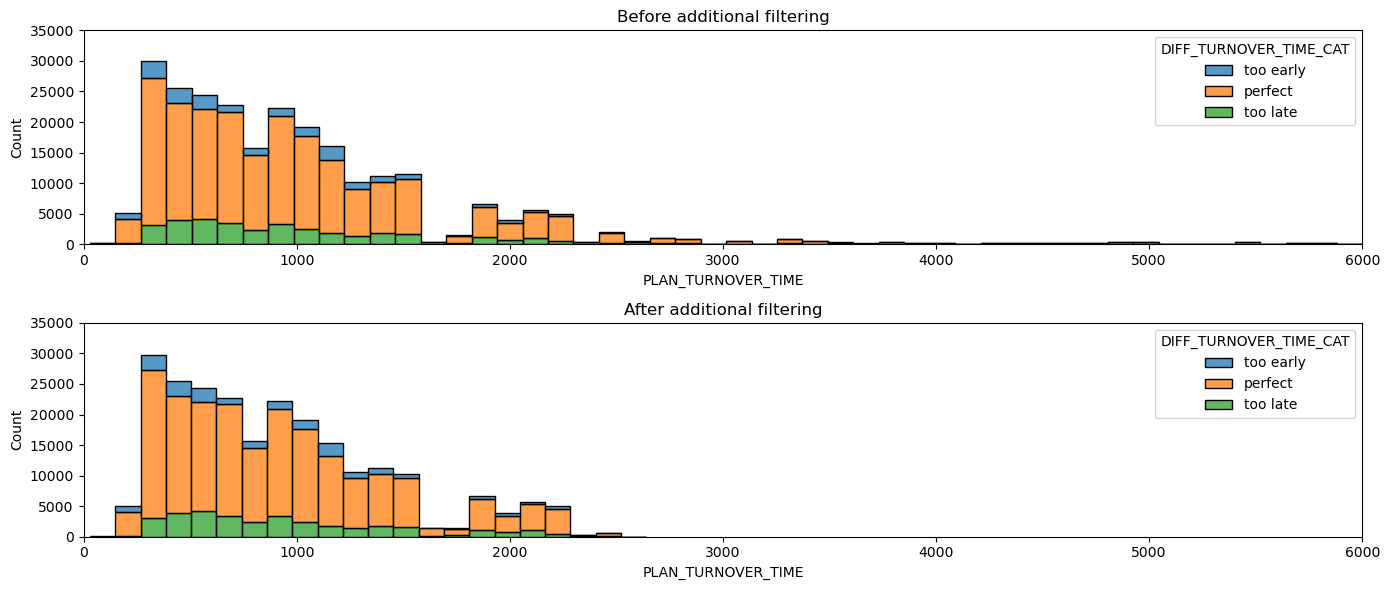

In [91]:
hue_order = ['too early', 'perfect', 'too late', 'past 3-minute mark']

# plot difference in distribution by additional filtering
# plt.figure(figsize=(14, 10), dpi= 100)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(14, 6), dpi= 100)

sns.histplot(ax = ax1, data = df_large_clean, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=50, multiple='stack', hue_order = hue_order[0:3] )
ax1.set_title('Before additional filtering')
ax1.set_xlim(0, 6000)
ax1.set_ylim(0, 35000)

sns.histplot(ax = ax2, data = df_more_filtered, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=22, multiple='stack', hue_order = hue_order[0:3] )
ax2.set_title('After additional filtering')
ax2.set_xlim(0, 6000)
ax2.set_ylim(0, 35000)
plt.tight_layout()

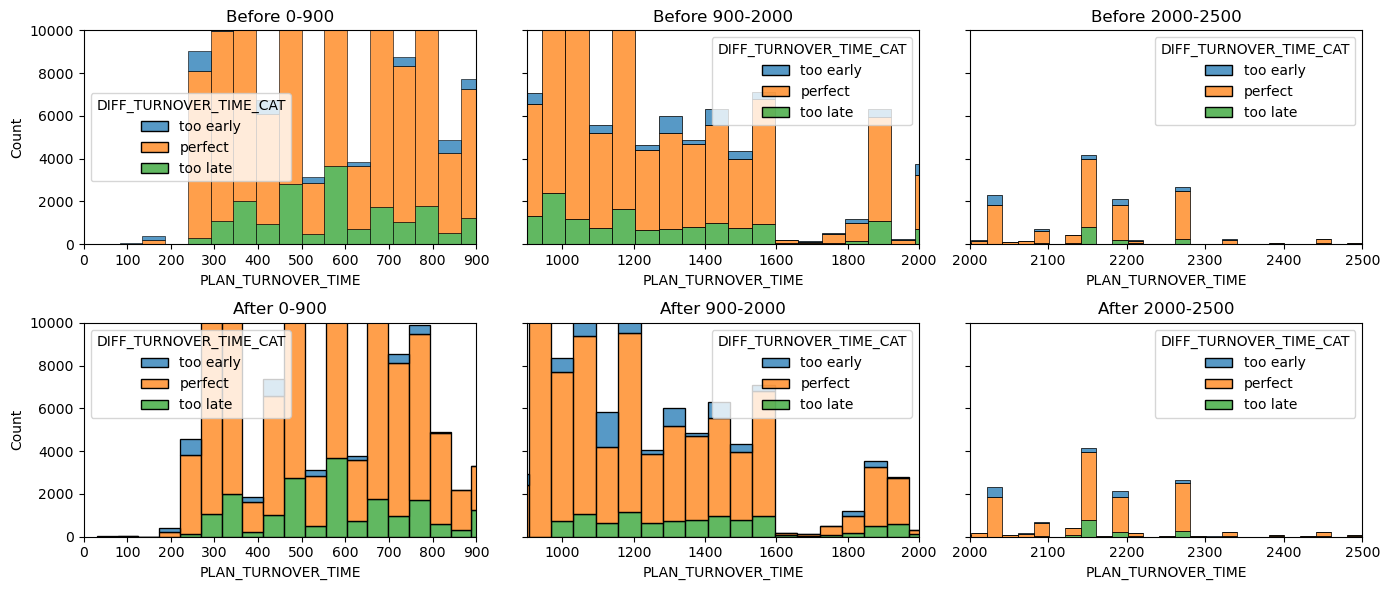

In [107]:
# plot difference in distribution by additional filtering
# plt.figure(figsize=(50, 100), dpi= 100)
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(14, 6), dpi= 100)


# 0-900
sns.histplot(ax = ax[0,0], data = df_more_filtered, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=50, multiple='stack', hue_order = hue_order[0:3] )
ax[0,0].set_title('Before 0-900')
ax[0,0].set_xlim(0, 900)
ax[0,0].set_ylim(0, 35000)

sns.histplot(ax = ax[1,0], data = df_0_900, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=22, multiple='stack', hue_order = hue_order[0:3] )
ax[1,0].set_title('After 0-900')
ax[1,0].set_xlim(0, 900)
ax[1,0].set_ylim(0, 35000)

# 900-2000
sns.histplot(ax = ax[0,1], data = df_more_filtered, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=40, multiple='stack', hue_order = hue_order[0:3] )
ax[0,1].set_title('Before 900-2000')
ax[0,1].set_xlim(900, 2000)
ax[0,1].set_ylim(0, 25000)

sns.histplot(ax = ax[1,1], data = df_900_2000, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=22, multiple='stack', hue_order = hue_order[0:3] )
ax[1,1].set_title('After 900-2000')
ax[1,1].set_xlim(900, 2000)
ax[1,1].set_ylim(0, 25000)

# 2000-2500
sns.histplot(ax = ax[0,2], data = df_2000_2500, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=40, multiple='stack', hue_order = hue_order[0:3] )
ax[0,2].set_title('Before 2000-2500')
ax[0,2].set_xlim(2000, 2500)
ax[0,2].set_ylim(0, 10000)

sns.histplot(ax = ax[1,2], data = df_2000_2500, x = 'PLAN_TURNOVER_TIME', hue = 'DIFF_TURNOVER_TIME_CAT',bins=40, multiple='stack', hue_order = hue_order[0:3] )
ax[1,2].set_title('After 2000-2500')
ax[1,2].set_xlim(2000, 2500)
ax[1,2].set_ylim(0, 10000)



plt.tight_layout()